<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_5_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [6]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.916007,61.291141,0.000794,120.207943,119.742745,0.465197
1,0.0,1.0,75.379398,36.979257,-1.250281,121.108374,121.799310,-0.690936
2,0.0,2.0,65.821052,68.063715,-1.278847,142.605920,143.323739,-0.717819
3,0.0,3.0,62.153380,34.443484,0.077187,106.674051,106.108659,0.565392
4,0.0,4.0,62.661948,32.954699,-0.306125,105.310522,105.128265,0.182257
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.051041,75.476707,0.522392,160.050139,159.823043,0.227096
19996,999.0,16.0,87.089943,33.267252,1.346132,131.703327,130.642920,1.060407
19997,999.0,17.0,36.783928,98.906857,0.092394,145.783179,145.798894,-0.015715
19998,999.0,18.0,66.658921,85.610436,-0.522618,161.746739,162.539631,-0.792892


In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.916007,61.291141,0.000794,120.207943,119.742745,0.465197
1,0.0,1.0,75.379398,36.979257,-1.250281,121.108374,121.799310,-0.690936
2,0.0,2.0,65.821052,68.063715,-1.278847,142.605920,143.323739,-0.717819
3,0.0,3.0,62.153380,34.443484,0.077187,106.674051,106.108659,0.565392
4,0.0,4.0,62.661948,32.954699,-0.306125,105.310522,105.128265,0.182257
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.051041,75.476707,0.522392,160.050139,159.823043,0.227096
19996,999.0,16.0,87.089943,33.267252,1.346132,131.703327,130.642920,1.060407
19997,999.0,17.0,36.783928,98.906857,0.092394,145.783179,145.798894,-0.015715
19998,999.0,18.0,66.658921,85.610436,-0.522618,161.746739,162.539631,-0.792892


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.916007  61.291141  0.000794  120.207943  119.742745  0.465197
      1.0    75.379398  36.979257 -1.250281  121.108374  121.799310 -0.690936
      2.0    65.821052  68.063715 -1.278847  142.605920  143.323739 -0.717819
      3.0    62.153380  34.443484  0.077187  106.674051  106.108659  0.565392
      4.0    62.661948  32.954699 -0.306125  105.310522  105.128265  0.182257
...                ...        ...       ...         ...         ...       ...
999.0 15.0   74.051041  75.476707  0.522392  160.050139  159.823043  0.227096
      16.0   87.089943  33.267252  1.346132  131.703327  130.642920  1.060407
      17.0   36.783928  98.906857  0.092394  145.783179  145.798894 -0.015715
      18.0   66.658921  85.610436 -0.522618  161.746739  162.539631 -0.792892
      19.0   36.260172  79.636425 -0.515745  125.380852  125.958820 -0.577968

[20000 rows x 6 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.916007  61.291141  0.000794  120.207943  119.742745  0.465197
      1.0    75.379398  36.979257 -1.250281  121.108374  121.799310 -0.690936
      2.0    65.821052  68.063715 -1.278847  142.605920  143.323739 -0.717819
      3.0    62.153380  34.443484  0.077187  106.674051  106.108659  0.565392
      4.0    62.661948  32.954699 -0.306125  105.310522  105.128265  0.182257
...                ...        ...       ...         ...         ...       ...
999.0 15.0   74.051041  75.476707  0.522392  160.050139  159.823043  0.227096
      16.0   87.089943  33.267252  1.346132  131.703327  130.642920  1.060407
      17.0   36.783928  98.906857  0.092394  145.783179  145.798894 -0.015715
      18.0   66.658921  85.610436 -0.522618  161.746739  162.539631 -0.792892
      19.0   36.260172  79.636425 -0.515745  125.380852  125.958820 -0.577968

[20000 rows x 6 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,48.916007,61.291141,0.000794,120.207943,119.742745,0.465197
1,0.0,1.0,75.379398,36.979257,-1.250281,121.108374,121.799310,-0.690936
2,0.0,2.0,65.821052,68.063715,-1.278847,142.605920,143.323739,-0.717819
3,0.0,3.0,62.153380,34.443484,0.077187,106.674051,106.108659,0.565392
4,0.0,4.0,62.661948,32.954699,-0.306125,105.310522,105.128265,0.182257
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.051041,75.476707,0.522392,160.050139,159.823043,0.227096
19996,999.0,16.0,87.089943,33.267252,1.346132,131.703327,130.642920,1.060407
19997,999.0,17.0,36.783928,98.906857,0.092394,145.783179,145.798894,-0.015715
19998,999.0,18.0,66.658921,85.610436,-0.522618,161.746739,162.539631,-0.792892


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    48.916007  61.291141  0.000794  120.207943  119.742745  0.465197
      1.0    75.379398  36.979257 -1.250281  121.108374  121.799310 -0.690936
      2.0    65.821052  68.063715 -1.278847  142.605920  143.323739 -0.717819
      3.0    62.153380  34.443484  0.077187  106.674051  106.108659  0.565392
      4.0    62.661948  32.954699 -0.306125  105.310522  105.128265  0.182257
...                ...        ...       ...         ...         ...       ...
999.0 15.0   74.051041  75.476707  0.522392  160.050139  159.823043  0.227096
      16.0   87.089943  33.267252  1.346132  131.703327  130.642920  1.060407
      17.0   36.783928  98.906857  0.092394  145.783179  145.798894 -0.015715
      18.0   66.658921  85.610436 -0.522618  161.746739  162.539631 -0.792892
      19.0   36.260172  79.636425 -0.515745  125.380852  125.958820 -0.577968

[20000 rows x 6 columns]

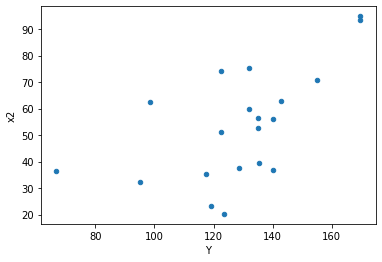

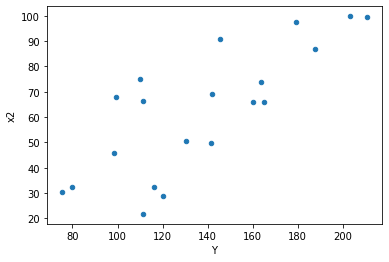

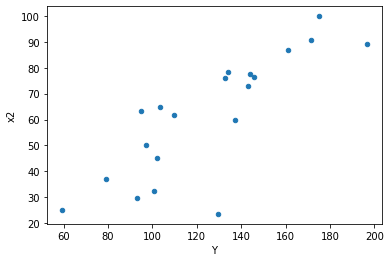

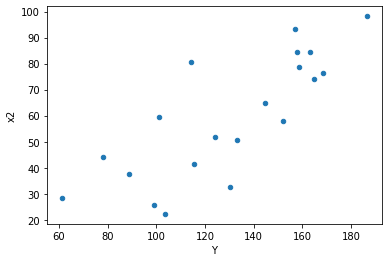

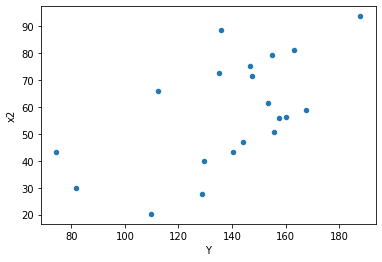

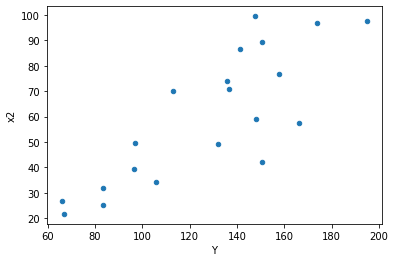

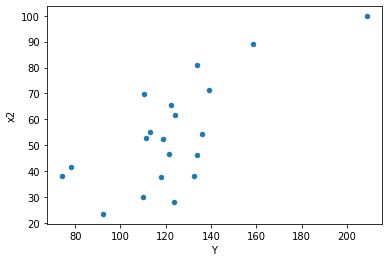

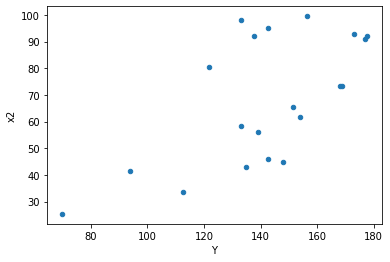

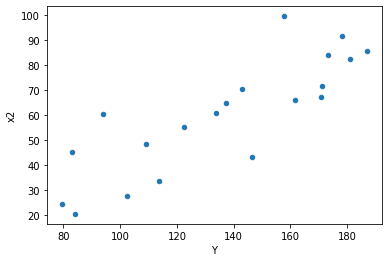

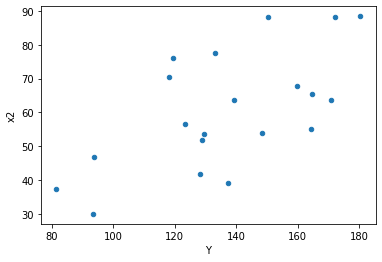

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [16]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,0.5355426557213213,1.7514456885480771,0.08925710928688689,0.29190761475801286,3.2704130470971697,0.17505718417035276,0.9124714079148236,0.08752859208517638,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2.395348992353646,4.4507751487424745,0.39922483205894105,0.7417958581237457,1.858090475730297,0.4699784425702911,0.7650107787148545,0.23498922128514554,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.9650882354494252,1.5589492917851528,0.16084803924157087,0.2598248819641921,1.6153437939891335,0.5748563799908752,0.7125718100045624,0.2874281899954376,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2.051732732354626,4.25188989301961,0.3419554553924377,0.7086483155032682,2.072341014972267,0.39677484995458845,0.8016125750227058,0.19838742497729422,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.044508125119858175,3.035675899083308,0.0074180208533096955,0.5059459831805514,68.20498259381593,5.904141822132836e-05,0.9999704792908893,2.952070911066418e-05,Reject005=0 : Heteroscedasticity
10.0,6.0,6.0,2.5164488869483064,4.187522446346573,0.41940814782471775,0.6979204077244288,1.66406020327509,0.5516247523961106,0.7241876238019447,0.2758123761980553,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,0.657322917385848,2.1402510529699876,0.109553819564308,0.35670850882833127,3.2560116137159754,0.17658978395403113,0.9117051080229844,0.08829489197701557,Reject005=1 : Homoscedasticity
13.0,6.0,6.0,0.2746674849277975,0.7382302901964788,0.04577791415463292,0.12303838169941313,2.687723632051093,0.25418097667174466,0.8729095116641277,0.12709048833587233,Reject005=1 : Homoscedasticity
14.0,6.0,6.0,0.47171062809158887,2.153768415789822,0.07861843801526482,0.358961402631637,4.565867901902857,0.08697937758333629,0.9565103112083319,0.043489688791668146,Reject005=1 : Homoscedasticity


In [18]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,2.1941698612219476,1.9223457807684805,0.3656949768703246,0.32039096346141344,0.8761152975175375,0.8765483748742364,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,0.5355426557213213,1.7514456885480771,0.08925710928688689,0.29190761475801286,3.2704130470971697,0.17505718417035276,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,3.0090709653580165,1.5498307698514446,0.5015118275596694,0.2583051283085741,0.5150529142362873,0.43957194085362783,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,2.395348992353646,4.4507751487424745,0.39922483205894105,0.7417958581237457,1.858090475730297,0.4699784425702911,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,2.7071767073760027,1.0635789425670568,0.45119611789600045,0.17726315709450946,0.39287385255244633,0.28034135216332323,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,5.908169536043534,2.805367522243268,0.9846949226739223,0.46756125370721136,0.47482854124763507,0.38662479280559875,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.9650882354494252,1.5589492917851528,0.16084803924157087,0.2598248819641921,1.6153437939891335,0.5748563799908752,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,2.051732732354626,4.25188989301961,0.3419554553924377,0.7086483155032682,2.072341014972267,0.39677484995458845,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.044508125119858175,3.035675899083308,0.0074180208533096955,0.5059459831805514,68.20498259381593,5.904141822132836e-05,Reject005=0 : Heteroscedasticity


In [19]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      930
Reject005=0 : Heteroscedasticity     70
Name: Result_test, dtype: int64